In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import tweepy
import re

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [36]:
consumer_key = "olNGiOUW71C5ZLqPEwsW0CK0w"
consumer_secret = "cwCA2CmbWZgVvWTPzHzX6EzMr9wlkgG7T08aeeDSNptOyDlKWn"
access_key = "1005727485831479296-VkqzdlMhyf6jWPukiK37gShhrDy1o7"
access_secret = "WgjDK7zCXm0i2Nw2q3G0biVX4ylOBxDV2Mm82V2tsAys4"
    
def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api

api = initialize()

In [37]:
comp_searches = ("@Google", "@IBM", "@Microsoft", "@Tesla", "@amazon")

In [38]:
# Array to hold sentiment
sentiments = []

# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 100 tweets
    comp_tweets = api.user_timeline(search, count=100)
    
    # Loop through the 100 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array
        sentiments.append({"User": search,
                           "text":text,
                       "Date": tweet["created_at"] 
                        })
    
    

In [40]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(10)
#df.shape

,Date,User,text
0,Wed May 06 08:21:35 +0000 2020,@Google,@Mubashirkaree17 Hmm. You can skip that step u...
1,Wed May 06 08:15:32 +0000 2020,@Google,"@shyeeeeen Hi there. Just to confirm, are you ..."
2,Wed May 06 07:38:38 +0000 2020,@Google,@jaygrl216 Hi Jada. This guide may help you wi...
3,Wed May 06 07:37:05 +0000 2020,@Google,@watIsAgoodUsern Hi there. Thanks for letting ...
4,Wed May 06 07:35:31 +0000 2020,@Google,"@RahidAltaf7 To best address your problem, We ..."
5,Wed May 06 07:32:07 +0000 2020,@Google,"@PunitHeights Hi Punit. Just to confirm, did y..."
6,Wed May 06 07:02:51 +0000 2020,@Google,"@Senyorito_Kobe Hmm. Just to confirm, did you ..."
7,Wed May 06 06:51:50 +0000 2020,@Google,@llPolzwaanll Hmm. Let's see what we can do to...
8,Wed May 06 06:50:12 +0000 2020,@Google,@sonkahvebukucu_ Hmm. Let's see what we can do...
9,Wed May 06 06:45:10 +0000 2020,@Google,"@Ashokpa49191043 Mind if we jump in, Ashok? Tr..."


In [41]:
#to see tweets for specific User name 
df_tesla = df[ df['User'] == '@Tesla']
df_tesla.head()

,Date,User,text
300,Thu Apr 09 00:41:11 +0000 2020,@Tesla,Tesla wins 5/6 Kelley Blue Book awards\n\n🏆 Be...
301,Sun Apr 05 23:18:35 +0000 2020,@Tesla,Engineering update on the Tesla ventilator
302,Sun Mar 22 20:30:51 +0000 2020,@Tesla,@UCLAHealth @elonmusk @3M Glad we can help! We...
303,Mon Mar 16 17:40:52 +0000 2020,@Tesla,Model Y deliveries begin!\n\nhttps://t.co/Zhui...
304,Sun Mar 15 02:51:41 +0000 2020,@Tesla,Giga New York built 4MW of Solar Roof last wee...


In [42]:
#cleaning the tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(tweets):
    # remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    # remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    # remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    # remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [43]:
df['text'] = clean_tweets(df['text'])
df['text'].head()

0     Hmm. You can skip that step using "Try anothe...
1     Hi there. Just to confirm, are you still able...
2     Hi Jada. This guide may help you with the Cal...
3     Hi there. Thanks for letting us know. This is...
4     To best address your problem, We recommend po...
Name: text, dtype: object

In [44]:
scores = []

# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df['text'].shape[0]):
    #print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [45]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)

In [46]:
df.head(10)

,Date,User,text,Compound,Negative,Neutral,Positive
0,Wed May 06 08:21:35 +0000 2020,@Google,"Hmm. You can skip that step using ""Try anothe...",0.0000,0.000,1.000,0.000
1,Wed May 06 08:15:32 +0000 2020,@Google,"Hi there. Just to confirm, are you still able...",0.0000,0.000,1.000,0.000
2,Wed May 06 07:38:38 +0000 2020,@Google,Hi Jada. This guide may help you with the Cal...,0.6486,0.000,0.751,0.249
3,Wed May 06 07:37:05 +0000 2020,@Google,Hi there. Thanks for letting us know. This is...,0.4404,0.000,0.854,0.146
4,Wed May 06 07:35:31 +0000 2020,@Google,"To best address your problem, We recommend po...",0.7717,0.122,0.452,0.425
5,Wed May 06 07:32:07 +0000 2020,@Google,"Hi Punit. Just to confirm, did you try resett...",0.0000,0.000,1.000,0.000
6,Wed May 06 07:02:51 +0000 2020,@Google,"Hmm. Just to confirm, did you try resetting y...",0.0000,0.000,1.000,0.000
7,Wed May 06 06:51:50 +0000 2020,@Google,Hmm. Let's see what we can do to help. Please...,0.7553,0.000,0.763,0.237
8,Wed May 06 06:50:12 +0000 2020,@Google,Hmm. Let's see what we can do to help. Look o...,0.4019,0.000,0.856,0.144
9,Wed May 06 06:45:10 +0000 2020,@Google,"Mind if we jump in, Ashok? Try clearing the c...",0.0000,0.000,1.000,0.000


In [47]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc=np.mean)
score_table

,Compound
User,
@Google,0.322729
@IBM,0.457647
@Microsoft,0.211750
@Tesla,0.202327
@amazon,0.760754


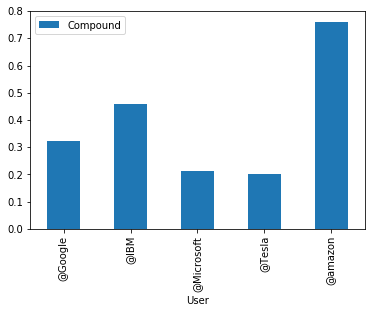

In [48]:
score_table.plot(kind='bar')

In [49]:
#Collect the compound values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc=np.mean)
neg_score_table

,Negative
User,
@Google,0.01820
@IBM,0.00727
@Microsoft,0.04721
@Tesla,0.02549
@amazon,0.00691


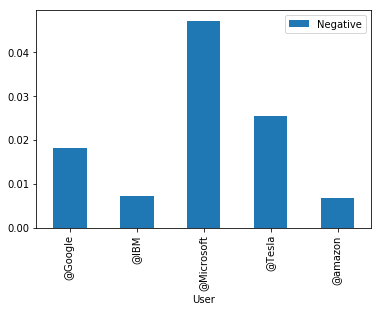

In [50]:
neg_score_table.plot(kind='bar')

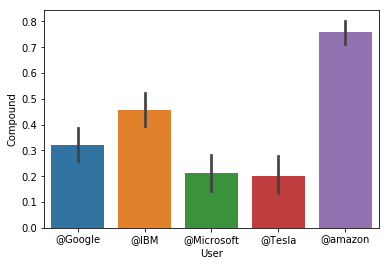

In [51]:
sns.barplot(x='User', y='Compound', data=df)

In [55]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5])
HT_negative = hashtag_extract(df['text'][df['Compound'] < -0.5])
# unnesting list
HT_positive = sum(HT_positive,[])

In [56]:
HT_positive

['ThankATeacher',
 'DearClassof2020',
 'staycreative',
 'stayhome',
 'GoogleDoodle',
 'BeEqual',
 'Think2020',
 'Think2020',
 'Think2020',
 'COVID19',
 'Think2020',
 'Think2020',
 'Think2020',
 'NationalTeachersDay',
 'TeacherAppreciationDay',
 'MicrosoftTeams',
 'security',
 'AI',
 'MicrosoftTeams',
 'MSBuild',
 'stayathome',
 'MicrosoftTeams',
 'Model3Au',
 '1']

In [62]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

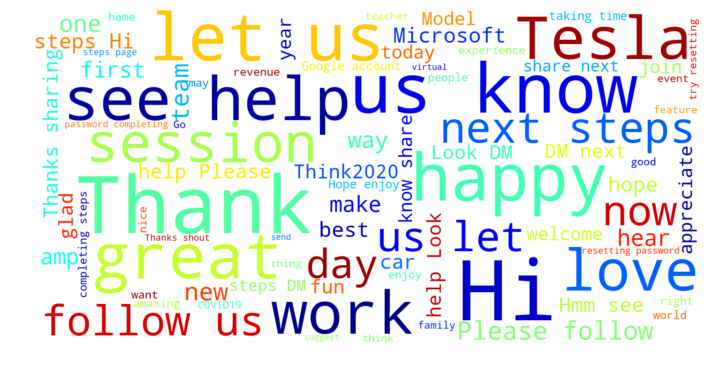

In [63]:
word_cloud(df['text'])